In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
from google.colab import drive

In [ ]:
data_train_path = '/content/drive/MyDrive/Fruits_Vegetables/Fruits_Vegetables/train/'
data_test_path = '/content/drive/MyDrive/Fruits_Vegetables/Fruits_Vegetables/test/'
data_val_path = '/content/drive/MyDrive/Fruits_Vegetables/Fruits_Vegetables/validation/'

In [ ]:
# generator
train_ds = keras.utils.image_dataset_from_directory(
    data_train_path,
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = data_val_path,
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)


Found 2024 files belonging to 36 classes.
Found 351 files belonging to 36 classes.


In [ ]:
# Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# create CNN model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(36, activation='softmax'))


In [ ]:
model.summary ()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
epochs_size = 15
history = model.fit( train_ds, validation_data = validation_ds, epochs=epochs_size)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


64/64 [==============================] - ETA: 0s - loss: 7.6746 - accuracy: 0.0756

KeyboardInterrupt: 

In [ ]:
epochs_range = range(10)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [ ]:
model.save('/content/drive/MyDrive/Fruits_Vegetables/vegclassmodel.kera')

**Transfer** **Learning**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
from tensorflow.keras.models import  load_model

In [ ]:
model = load_model('/content/drive/MyDrive/Fruits_Vegetables/vegclassmodel.kera')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

Image resize: image datatype <class 'PIL.Image.Image'> <PIL.Image.Image image mode=RGB size=256x256 at 0x7AE8738EDA80>
tf.Tensor(
[[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]], shape=(1, 256, 256, 3), dtype=uint8)
tf.Tensor(
[[[[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1

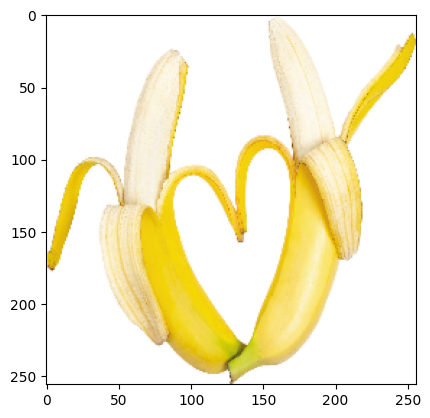

In [ ]:

image = 'Banana.jpg'
image = tf.keras.utils.load_img(image, target_size=(256,256)) #Resizing the image
print("Image resize:","image datatype", type(image),image)

plt.imshow(image)


#img_arr = tf.keras.utils.array_to_img(image)
#print("Image to array: ","image datatype", type(img_arr),img_arr)

img_bat=tf.expand_dims(image,0) # convert resize image into  2dimention array
print(img_bat)

img_bat=img_bat/255    # normalizing images of 2Dimention arry
print(img_bat)




In [ ]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 69ms/step


In [ ]:
score = tf.nn.softmax(predict)
print(score)

tf.Tensor(
[[0.02753953 0.06429979 0.02698103 0.02665582 0.02664396 0.02665851
  0.0267501  0.02666664 0.02701764 0.02665367 0.02664771 0.02668251
  0.02667399 0.02678525 0.02669106 0.02669479 0.02670948 0.02681937
  0.02664985 0.02723891 0.02680381 0.02666053 0.02668303 0.02665188
  0.02664679 0.0266489  0.02664495 0.02664298 0.0266445  0.02665485
  0.02664294 0.02664293 0.02664293 0.02664293 0.0266434  0.02664301]], shape=(1, 36), dtype=float32)


In [ ]:
import numpy as np

In [ ]:
data_cat = ['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [ ]:
print('vegitable in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

vegitable in image is banana with accuracy of 6.43
